In [1]:
import os

In [2]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%reload_ext importnb
import GANstructure

Using TensorFlow backend.


In [4]:
path='../data/camel/full_numpy_bitmap_camel.npy'

In [5]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [35]:
def loader(path):
    dataset_size=5000
    dataset=np.load(path)
    no_of_images=dataset.shape[0]
    dataset=dataset.reshape(no_of_images,28,28,1)
    dataset=dataset[:dataset_size]
    dataset = dataset.astype('float32') / 255.0
    '''
    test 1
    arr = np.arange(10)
    np.random.shuffle(arr)
    print(arr)
    '''
    np.random.shuffle(dataset)
   
    return dataset

In [38]:
x=loader(path)
x=np.squeeze(x)

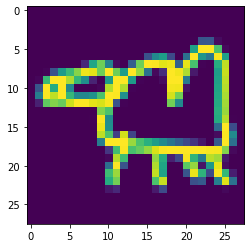

In [39]:
plt.imshow(x[50])
plt.show()